In [1]:
# project: p1
# submitter: raffanti
# partner: none
# hours: 10

In [2]:
import os, sys, json, csv, re, math
import matplotlib.pyplot as plt
import pandas
import pandas as pd

In [3]:
#Q1
type(7/2)

float

In [4]:
#Q2
x = 4
maximum = 10
minimum = 5
error = x < minimum or x > maximum
error

True

In [5]:
#Q3
word = "KAFKAESQUE"
suffix_match = (word.upper()[5:] == "ESQUE")
suffix_match

True

In [6]:
#Q4
def add(x=1, y=None):
    if y is None:
        return x + 1
    else:
        return x + y
    
add(3, 4)

7

In [7]:
#Q5
add(9)

10

In [8]:
#Q6
x = 4
if x < 0:
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [9]:
#Q7
nums = [3,4,1,6]
def smart_count(numbers):
    total = 0
    for x in numbers:
        if x > 10:
            continue
        if x < 0:
            break
        total += x
    return total
smart_count(nums)

14

In [10]:
#Q8
smart_count([2,1,11,3,15,-1,8,2])

6

In [11]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [[1,  6, coord1], [3, 4, coord2], [5, 2, coord3],]
coord3["z"] = 3.14

In [12]:
#Q9
rows = [[1, 6, {"x": 8, "y": 5}],[3, 4, {"x": 9, "y": 2}],[5, 2, {"x": 3, "y": 1, "z": 3.14}]]
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [13]:
#Q10
rows[0][-1]["x"]

8

In [14]:
#Q11
import copy
v2 = copy.copy(rows)
v2[0] = 8888
v2[1][1] = 9999
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [15]:
#Q12
def add_column(list_of_lists):
    total = 0
    for list in list_of_lists:
        total += list[header.index("B")]
    return total
add_column(rows)

10007

In [16]:
#Q13
rows.sort(key=lambda row: row[header.index("B")])
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [17]:
f = open("usd.json")
data = json.load(f)
f.close()

In [18]:
#Q14
usd_to_euro = data["eur"]["rate"]
euro = 400 * usd_to_euro
euro

366.735529954884

In [19]:
def divide(a, b):
    try:
        result = a / b
    except ZeroDivisionError:
        result = float("nan")
    return result

In [20]:
#Q15
divide(3,2)

1.5

In [21]:
#Q16
divide(-3, 0)

nan

In [22]:
#Q17
years = {}
for filename in os.listdir("home-computers"):
    if filename.endswith(".csv"):
        year = int(filename[7:11])
        data = pd.read_csv("home-computers/" + filename, skiprows=1)
        data = data.set_index("Geographic Area Name")
        years[year] = data
list(years.keys())

[2013, 2014, 2015, 2016, 2018, 2017]

In [23]:
#Q18
df = years[2018]
households = df.at["Wisconsin", "Estimate!!Total"]
households

2371960

In [24]:
#Q19
no_computer = df["Estimate!!Total!!No Computer"]
no_computer.sum()

10285814

In [25]:
#Q20
estimate = df["Estimate!!Total!!No Computer"]
margin_error = df["Margin of Error!!Total!!No Computer"]
fraction = margin_error/estimate
fraction.max()

0.12375641594322287

In [26]:
#Q21
neighbors = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
stats = {}
for state in neighbors:
    total = df.at[state, "Estimate!!Total"]
    no_computer = df.at[state, "Estimate!!Total!!No Computer"]
    percentage = no_computer / total * 100
    stats[state] = percentage
stats


{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

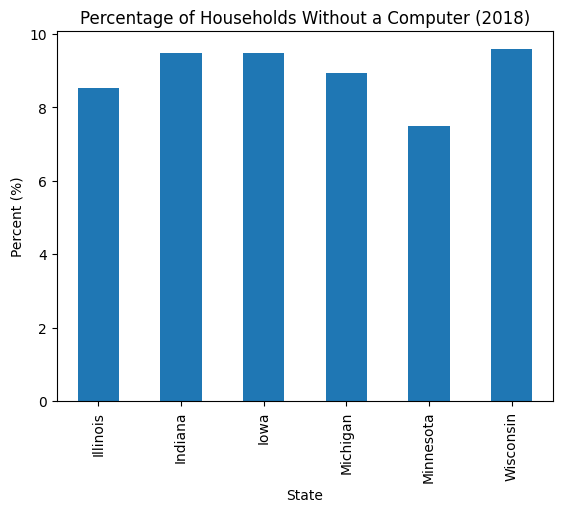

In [27]:
#Q22
percent = (years[2018]["Estimate!!Total!!No Computer"] / years[2018]["Estimate!!Total"]) * 100
percent = percent.loc[neighbors]
percent.plot.bar()
plt.title("Percentage of Households Without a Computer (2018)")
plt.xlabel("State")
plt.ylabel("Percent (%)")
plt.show()

Text(0, 0.5, 'WI Households without Computers (thousands)')

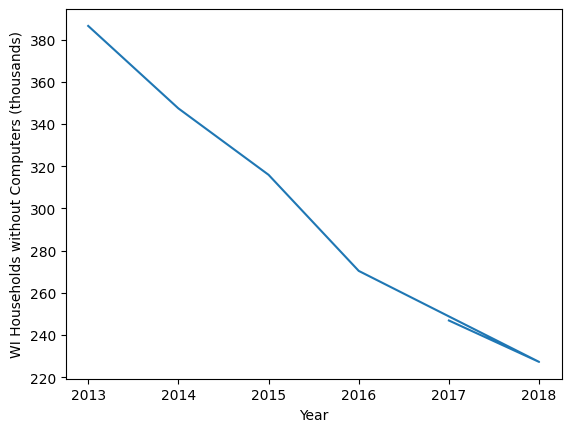

In [28]:
#Q23
years_list = list(years.keys())
wi_no_computer = {}
for year in years_list:
    total = (int(years[year].at["Wisconsin", "Estimate!!Total!!No Computer"])/1000)
    wi_no_computer[year] = total
wi_series = pd.Series(wi_no_computer)
line_plot = wi_series.plot.line()
line_plot.set_xlabel("Year")
line_plot.set_ylabel("WI Households without Computers (thousands)")

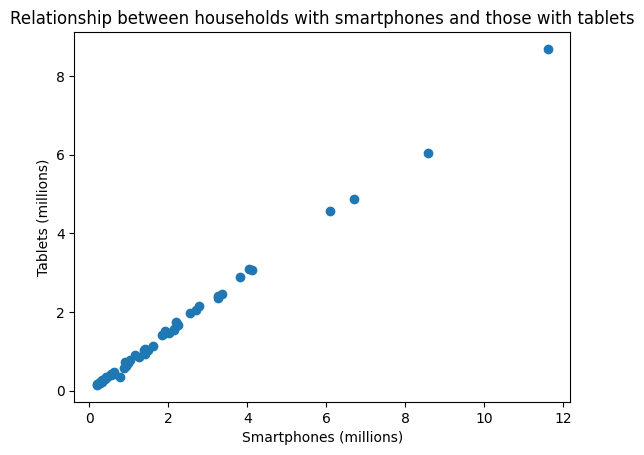

In [29]:
#Q24
smartphones = "Estimate!!Total!!Has one or more types of computing devices!!Smartphone"
tablets = "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"
smartphone = df[smartphones] / 1e6
tablet = df[tablets] / 1e6
plt.scatter(smartphone, tablet)
plt.xlabel("Smartphones (millions)")
plt.ylabel("Tablets (millions)")
plt.title("Relationship between households with smartphones and those with tablets")
plt.show()

In [30]:
import subprocess
from subprocess import check_output
from time import time

In [31]:
#Q25
check_output(["git", "checkout", "main"], cwd = "flask")
lines = str(check_output(["git", "log"], cwd = "flask"), "utf-8").split("\n")
lines[0]

Already on 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [32]:
#Q26
commits = []
for i in lines:
    numbers = i.split()
    if len(numbers) and numbers[0] == "commit":
        commits.append(numbers[1])
commits[-30:]

['03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cda61f76c64b97ab9f730accc986a4b188',
 '03168a5d53457fdb8676a4ac9fca0f76a23c6852',
 '0b8e01b4450d0ba8cb65751d866568fddc155fa4',
 '6a3a046f55755f0691568431e68a8bfea8d89df0',
 'd78b04a3fca8d8887382606897d4a97e55062fda',
 '4671429a509094f36e2294055340197091d39979',
 '4e7aa9e7f7a86ee0ea4b6801694c13151518cb52',
 '85ca089dde8814c4a42ad4574cddce25d60e5e25',
 '8171da88a49eba769d313a51591ee8575be59762',
 'df929c6c77ea5490a969275e45075c29711a498c',
 '574e81f9c8bbdc41958e1e7a7613633b091101f8',
 '1fff3e598126a084348ec2c112fdd3bc6b9a1ee0',
 '05f36c7f7e2df36ee28f90d99632162579b1287c',
 '4e1b3e1134eb478563bc434d794085d0a412cb84',
 '8e9bd5f009bb8756a2a7d76a4b792323eeee49d6',
 '9dfab582d065521e9350327801ed2c5ced1c8fa1',
 '3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6',
 '7d6b8e9ab3e738d69e39ad53a7c0f6a552d5284a',
 'a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b

In [33]:
#Q27
str(subprocess.check_output(["git", "checkout", commits[-2]], cwd="flask"), "utf-8")
f = open("flask/README", "r")
f.read()

Note: switching to 'b15ad394279fc3b7f998fa56857f334a7c0156f6'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at b15ad394 Added setup.py and README


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [34]:
#Q28

subprocess.check_output(['git', 'checkout','main'], cwd= "flask")
outputs = str(subprocess.check_output(["git", "log"], cwd = "flask"), "utf-8").split("\n")

username_dict1 = {}

for i in outputs:
    if "Merge pull request" in i and "/" in i:
        username = i.split("/")[0].split(' ')[-1]
        if username not in username_dict1:
            username_dict1[username] = 1
        else:
            username_dict1[username] += 1
            
username_dict2 = {}
for x in username_dict1:
    if username_dict1[x] >= 5:
        username_dict2[x] = username_dict1[x]
        
username_dict2

Previous HEAD position was b15ad394 Added setup.py and README
Switched to branch 'main'


{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'jeffwidman': 8,
 'garenchan': 8,
 'davidism': 45,
 'dawran6': 7,
 'untitaker': 20,
 'lord63-forks': 5,
 'methane': 5,
 'Winnetou': 6,
 'defuz': 6,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [35]:
#Q29
import subprocess
try:
    msg = subprocess.check_output(["pip3", "instal"], stderr=subprocess.STDOUT)
except subprocess.CalledProcessError as e:
    msg = e.output
msg.decode("utf-8")

'ERROR: unknown command "instal" - maybe you meant "install"\n'

Text(0, 0.5, 'Milliseconds')

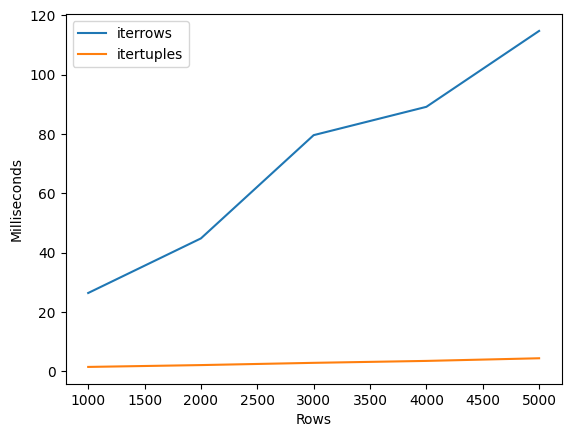

In [36]:
#Q30
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])

results = pd.DataFrame(dtype = float)

for rows in range(1000, 6000, 1000):
    df = rand_df(rows)
    start1 = time.time()
    for i in df.iterrows():
        pass
    end1 = time.time()
    iter_time = (end1 - start1) * 1000 
    start2 = time.time()
    for i in df.itertuples():
        pass
    end2 = time.time()
    tuple_time = (end2 - start2) * 1000
    results.at[rows, "iterrows"] = iter_time
    results.at[rows, "itertuples"] = tuple_time
plot = results.plot.line()
plot.set_xlabel("Rows")
plot.set_ylabel("Milliseconds")

Text(0, 0.5, 'Milliseconds')

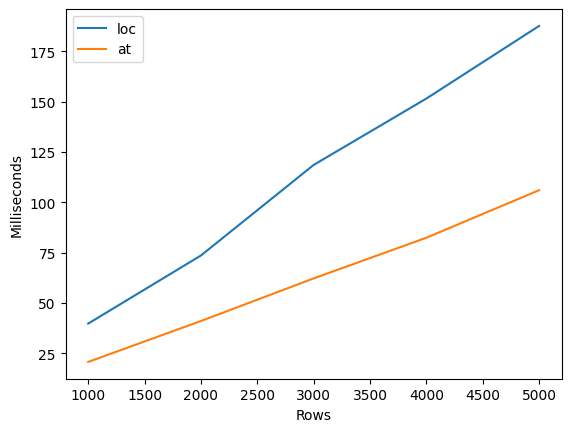

In [37]:
#Q31
results2 = pd.DataFrame(dtype = float)

for rows in range(1000, 6000, 1000):
    df = rand_df(rows)
    start1 = time.time()
    count = 0
    for row in df.index:
        for col in df.columns:
            count += df.loc[row, col]
    end1 = time.time()
    loc_time = (end1 - start1) * 1000   
    start2 = time.time()
    count = 0
    for row in df.index:
        for col in df.columns:
            count += df.at[row, col]
    end2 = time.time()
    at_time = (end2 - start2) * 1000
    results2.at[rows, "loc"] = loc_time
    results2.at[rows, "at"] = at_time    
plot2 = results2.plot.line()
plot2.set_xlabel("Rows")
plot2.set_ylabel("Milliseconds")

Text(0, 0.5, 'Milliseconds')

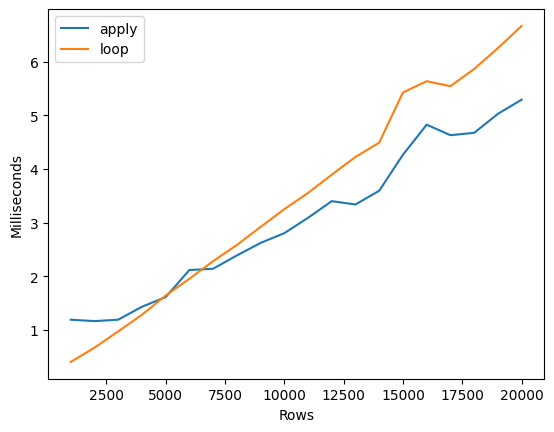

In [38]:
#Q32
results3 = pd.DataFrame(dtype = float)
def laugh(x):
    return "ha" * x

for rows in range(1000, 21000, 1000):
    df = rand_df(rows)
    start1 = time.time()
    result = df["A"].apply(laugh).tolist()
    end1 = time.time()
    apply_time = (end1 - start1) * 1000
    start2 = time.time()
    result = []
    for idx in df["A"]:
        result.append(laugh(idx))
    end2 = time.time()
    loop_time = (end2 - start2) * 1000
    results3.at[rows, "apply"] = apply_time
    results3.at[rows, "loop"] = loop_time
plot3 = results3.plot.line()
plot3.set_xlabel("Rows")
plot3.set_ylabel("Milliseconds")